In [1]:
"""
This is a demo to showcase the (currently extremely basic) logic of the simulator

Each nation has a population with different average characteristics - currently the only characteristic which is
actually used is average sociability (number of daily interactions per person per day is drawn from a Poisson dist)


Nations can border each other. Nations which share a border exchange a set number of citizens each day.

Each interaction in which exactly one of the two members is currently infected has a fixed probability
of resulting in transmission. Transmission will be negated if the receiving individual is immne

For each day that a person is infected after the pathogen incubation period has elapsed, their health is reduced 
as a function of base mortality and their ability to resist (baseline health and disease resistance are both
deterministic functions of age)

Infection in a person will continue until that person's health reaches zero or until the pre-determined 
length of infection has elapsed. If the person survives infection they remain immune.


"""
from world import World, Pathogen
from matplotlib import pyplot as plt

In [2]:
"""
initialize a new world, and create 3 nations
all nations are identical except for the average rate of social contact in the population
"""

world = World(
    base_immunity=0.8,
    max_age=100
)

world.init_nation(
    'Not Sociable',  # in a real-world simulator nations coudld be given actual country names
    pop_size=1000,
    avg_compliance=.5,  # currently not used, eventually will determine obediance to countermeasure
    avg_age=20,  # currently not used (age is uniform distribution)
    sociability=2  # avg number of social contacts per day
)

world.init_nation(
    'Somewhat Sociable',
    pop_size=1000,
    avg_compliance=.5,
    avg_age=20,
    sociability=5,
    borders=['Not Sociable', 'Very Sociable']  # this nation will both of the other two
)

world.init_nation(
    'Very Sociable',
    pop_size=1000,
    avg_compliance=.5,
    avg_age=20,
    sociability=20
)

world.init_borders()  # generate appropriate borders - border nations exchange 10 people per day


virus = Pathogen(
    contagiousness=0.02,  # chance of an infected person passing on the infection per contact
    base_mortality=5,  # black-box factor by which the disease decreases health each day
    incubation_period=3,  # number of days from infection until disease begins
    disease_length=10,  # number of days from onset of symptoms until recovered
    latent_period=1  # number of days from infection until contagious
)

world.initiate_infection(virus, nation='Somewhat Sociable')  # patient zero is a random member of the moderately-sociable nation

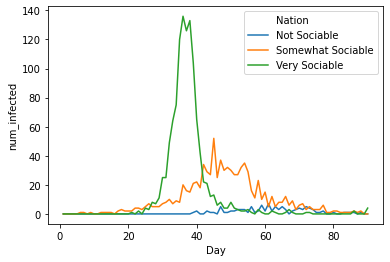

In [3]:
world.new_day(days=90, verbose=False)
world.plot_daily_infections()
plt.show()


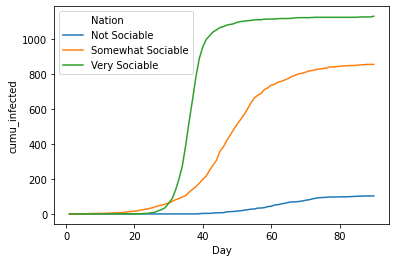

In [4]:

world.plot_total_infections()
plt.show()

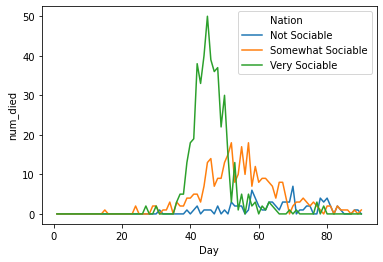

In [5]:
world.plot_daily_deaths()
plt.show()

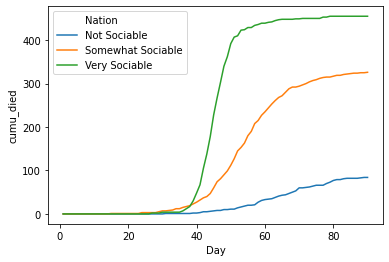

In [6]:
world.plot_total_deaths()
plt.show()